In [2]:
import requests
import seaborn as sns
import json
import time
import re
import os
import random
import numpy as np
import pandas as pd
from os import system
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# from keys.py import *

In [3]:
api_key='BwaX8qocwcSEcX8fh3VocsCTIt8XrFIyJ1s5FxvU'

In [4]:
to_run

NameError: name 'to_run' is not defined

In [60]:

new_listy=new_list.split('\n')[1::2]

In [59]:
town_list=open('town_zip_list.txt')
listy=town_list.read().split('\n')[1::2]

In [84]:
names_so_far

['Dorchester Center, MA',
 'Scarsdale, NY',
 'Valrico, FL',
 'Bismarck, ND',
 'Ridgewood, NJ',
 'Natchez, MS',
 'Southaven, MS',
 'Garfield, NJ',
 'Strongsville, OH',
 'Holly Springs, NC',
 'Williamsburg, VA',
 'Ridgefield, CT',
 'Orlando, FL',
 'Kenosha, WI',
 'Green Cove Springs, FL',
 'Parkville, MD',
 'Whitestone, NY',
 'Adrian, MI',
 'West Chicago, IL',
 'Kennewick, WA',
 'Crofton, MD',
 'Rock Hill, SC',
 'Minot, ND',
 'Norman, OK',
 'Loveland, OH',
 'Pickerington, OH',
 'Logansport, IN',
 'Lake Villa, IL',
 'Bountiful, UT',
 'Ft Mitchell, KY',
 'Elyria, OH',
 'Woodside, NY',
 'Hopkinsville, KY',
 'Jonesboro, GA',
 'Winter Springs, FL',
 'Anderson, SC',
 'Massillon, OH',
 'Pawtucket, RI',
 'Lansdowne, PA',
 'Hanover, PA',
 'Sevierville, TN',
 'Butte, MT',
 'Palatine, IL',
 'Sterling, VA',
 'Libertyville, IL',
 'Osseo, MN',
 'Bristol, CT',
 'Annandale, VA',
 'Greenville, NC',
 'Lapeer, MI',
 'Glen Ellyn, IL',
 'Prattville, AL',
 'Rocky Mount, NC',
 'Olive Branch, MS',
 'Davenport, 

In [61]:
to_run=[]
for i in new_listy:
    if i not in listy:
        to_run.append(i)
print(len(to_run))

130


In [73]:
# def get_energy_data(cities)
towns=[]
for i in to_run:
    print(i)
    time.sleep(.01)
    city, state=i.split(', ')
    url=f"https://developer.nrel.gov/api/cleap/v1/energy_expenditures_and_ghg_by_sector?city={city}&state_abbr={state}&api_key={api_key}"
    data=requests.get(url).json()
#     print(data)
    if data['errors']:
        print(data['errors'])
        pass
    else:
        print('_______')
        town=data['result']
        resi=list(town.values())[0]['residential']
        comm=list(town.values())[0]['commercial']
        indu=list(town.values())[0]['industrial']
        town_={
            'name':str(list(town.keys())[0]),
            'state':state,
            'houses':resi['housing_units'],
            'pop':resi['total_pop'],
            'biz':comm['num_establishments'],
            'ind':indu['num_establishments'],
            'res_gas_mcf':resi['gas_mcf'],
            'res_gas_1kdol':resi['gas_1kdollars'],
            'res_elec_ghg':resi['elec_lb_ghg'],
            'res_gas_ghg':resi['gas_lb_ghg'],
            'com_gas_mcf':comm['gas_mcf'],
            'com_gas_1kdol':comm['gas_1kdollars'],
            'com_elec_ghg':comm['elec_lb_ghg'],
            'com_gas_ghg':comm['gas_lb_ghg'],
            'ind_gas_mcf':indu['gas_mcf'],
            'ind_gas_1kdol':indu['gas_1kdollars'],
            'ind_elec_ghg':indu['elec_lb_ghg'],
            'ind_gas_ghg':indu['gas_lb_ghg']
        }
        towns.append(town_)
        
    
    
        



Cookeville, TN
_______
Floral Park, NY
[{'code': 'NOT_FOUND', 'developer_message': 'No data was found for the city/state_abbr or zip provided'}]
Feasterville Trevose, PA
[{'code': 'NOT_FOUND', 'developer_message': 'No data was found for the city/state_abbr or zip provided'}]
Dunedin, FL
_______
Asheboro, NC
_______
Lynchburg, VA
_______
Davison, MI
_______
Baldwinsville, NY
[{'code': 'NOT_FOUND', 'developer_message': 'No data was found for the city/state_abbr or zip provided'}]
Tualatin, OR
_______
Champaign, IL
_______
Harlingen, TX
_______
Sebastian, FL
_______
North Wales, PA
_______
Milton, MA
_______
Anchorage, AK
_______
Natick, MA
_______
Greenfield, IN
_______
Chicopee, MA
_______
Holbrook, NY
[{'code': 'NOT_FOUND', 'developer_message': 'No data was found for the city/state_abbr or zip provided'}]
Franklin, MA
[{'code': 'NOT_FOUND', 'developer_message': 'No data was found for the city/state_abbr or zip provided'}]
Chesapeake, VA
_______
Emporia, KS
_______
Woburn, MA
_______
Mi

In [75]:
town_data=pd.concat([town_data,town_])

In [87]:
town_data.to_csv('town_data_2')

In [94]:
town_data.head

,biz,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,houses,ind,ind_elec_ghg,ind_gas_1kdol,ind_gas_ghg,ind_gas_mcf,name,pop,res_elec_ghg,res_gas_1kdol,res_gas_ghg,res_gas_mcf,state
0,472.0,67437855.0,1249.0,28095916.0,234049.0,5437.0,35.0,2757150.0,47.0,962338.0,8017.0,Scarsdale,17137.0,81045481.0,10632.0,95458580.0,795205.0,NY
1,927.0,337550656.0,4000.0,88869152.0,740313.0,29680.0,290.0,262308579.0,2668.0,122239228.0,1018298.0,Bismarck,68981.0,271312168.0,11497.0,188394738.0,1569398.0,ND
2,653.0,202329017.0,2790.0,46272451.0,385467.0,8335.0,88.0,4662251.0,133.0,2425500.0,20205.0,Ridgewood,25430.0,155528162.0,7578.0,121772514.0,1014410.0,NJ
3,513.0,154290472.0,1013.0,16820605.0,140122.0,6235.0,179.0,13753718.0,272.0,7518503.0,62632.0,Natchez,15345.0,140880520.0,2100.0,25006228.0,208311.0,MS
4,630.0,582120118.0,2371.0,39360611.0,327888.0,18386.0,134.0,89281642.0,1674.0,46200938.0,384871.0,Southaven,51816.0,451151482.0,6928.0,82754153.0,689373.0,MS


In [8]:
town_data=pd.read_csv('town_data_2',index_col=0)

In [6]:
data.head()

,biz,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,houses,ind,ind_elec_ghg,ind_gas_1kdol,ind_gas_ghg,ind_gas_mcf,name,pop,res_elec_ghg,res_gas_1kdol,res_gas_ghg,res_gas_mcf,state
0,472.0,67437855.0,1249.0,28095916.0,234049.0,5437.0,35.0,2757150.0,47.0,962338.0,8017.0,Scarsdale,17137.0,81045481.0,10632.0,95458580.0,795205.0,NY
1,927.0,337550656.0,4000.0,88869152.0,740313.0,29680.0,290.0,262308579.0,2668.0,122239228.0,1018298.0,Bismarck,68981.0,271312168.0,11497.0,188394738.0,1569398.0,ND
2,653.0,202329017.0,2790.0,46272451.0,385467.0,8335.0,88.0,4662251.0,133.0,2425500.0,20205.0,Ridgewood,25430.0,155528162.0,7578.0,121772514.0,1014410.0,NJ
3,513.0,154290472.0,1013.0,16820605.0,140122.0,6235.0,179.0,13753718.0,272.0,7518503.0,62632.0,Natchez,15345.0,140880520.0,2100.0,25006228.0,208311.0,MS
4,630.0,582120118.0,2371.0,39360611.0,327888.0,18386.0,134.0,89281642.0,1674.0,46200938.0,384871.0,Southaven,51816.0,451151482.0,6928.0,82754153.0,689373.0,MS


# EDA n Clean

In [10]:
town_data.dropna().shape

(1103, 18)

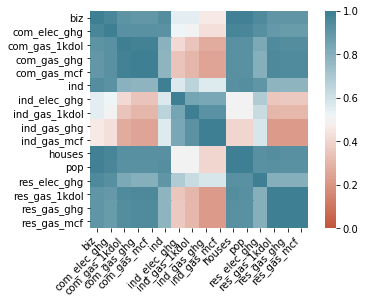

In [9]:
biz=['biz','com_elec_ghg','com_gas_1kdol','com_gas_ghg','com_gas_mcf',]
ind=['ind','ind_elec_ghg','ind_gas_1kdol','ind_gas_ghg','ind_gas_mcf',]
com=['houses','pop','res_elec_ghg','res_gas_1kdol','res_gas_ghg','res_gas_mcf']
data=town_data[biz+ind+com].dropna()

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [101]:
town_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 100
Data columns (total 18 columns):
biz              1104 non-null float64
com_elec_ghg     1104 non-null float64
com_gas_1kdol    1104 non-null float64
com_gas_ghg      1104 non-null float64
com_gas_mcf      1104 non-null float64
houses           1110 non-null float64
ind              1109 non-null float64
ind_elec_ghg     1109 non-null float64
ind_gas_1kdol    1109 non-null float64
ind_gas_ghg      1109 non-null float64
ind_gas_mcf      1109 non-null float64
name             1111 non-null object
pop              1110 non-null float64
res_elec_ghg     1110 non-null float64
res_gas_1kdol    1110 non-null float64
res_gas_ghg      1110 non-null float64
res_gas_mcf      1110 non-null float64
state            1111 non-null object
dtypes: float64(16), object(2)
memory usage: 164.9+ KB


In [120]:
town_data['state'].value_counts()

NJ    89
FL    74
PA    72
IL    72
OH    70
MA    59
MI    59
GA    57
NC    54
NY    44
CT    39
CA    37
WI    36
IN    34
VA    32
SC    28
TN    27
MN    26
TX    22
MD    19
IA    18
AL    16
MS    14
KY    13
WA    12
NH    10
RI     9
WV     7
AZ     7
LA     6
ND     5
MT     5
CO     5
ME     5
UT     4
OR     4
OK     3
NE     3
SD     3
ID     2
AK     2
KS     2
AR     2
MO     2
NV     1
HI     1
Name: state, dtype: int64

In [1]:
town_data.loc[town_data['state']=='ME']

NameError: name 'town_data' is not defined